In [1]:
# set path 
import os
os.chdir('C:/Users/Ming Guo 69/Desktop/180DA-WarmUp')



In [2]:
# imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#contour functions for drawing contour on complex shapes 
#note: i added a line where it also return a cropped image of within the box 

# This function allows us to create a descending sorted list of contour areas.
def contour_area(contours):
     
    # create an empty list
    cnt_area = []
     
    # loop through all the contours
    for i in range(0,len(contours),1):
        # for each contour, use OpenCV to calculate the area of the contour
        cnt_area.append(cv2.contourArea(contours[i]))
 
    # Sort our list of contour areas in descending order
    list.sort(cnt_area, reverse=True)
    return cnt_area

def draw_bounding_box(contours, image, number_of_boxes=1):
    # Call our function to get the list of contour areas
    cnt_area = contour_area(contours)
 
    # Loop through each contour of our image
    for i in range(0,len(contours),1):
        cnt = contours[i]
 
        # Only draw the the largest number of boxes
        if (cv2.contourArea(cnt) >= cnt_area[number_of_boxes]):
             
            # Use OpenCV boundingRect function to get the details of the contour
            x,y,w,h = cv2.boundingRect(cnt)
             
            # crop by typing y first then x 
            # also do this before next step so the rect line is not in cropped image
            cropped = image[y:y+h, x:x+w]
            # Draw the bounding box
            image=cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
            
            
 
    return image, cropped 

In [61]:
# import image
blu = cv2.imread('blu.jpeg', 1)
# change color domian
hsv = cv2.cvtColor(blu, cv2.COLOR_BGR2HSV)

# find blue part of image
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(blu,blu, mask= mask)
'''
cv2.imshow('frame',blu)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
'''
cv2.imshow('mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

"\ncv2.imshow('mask', mask)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

In [62]:
# use mask for box 
# invert mask so the box is right 
mask_inv = cv2.bitwise_not(mask)

# find contours 
#ret,thresh = cv2.threshold(mask_inv,127,255,0)
contours, _ = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [63]:
blu_with_contour = cv2.drawContours(blu, contours, -1, [0,0,255], 2)
cv2.imshow('contour', blu_with_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
len(contours)

16

In [65]:
contour_size = np.ones(len(contours))
for i in range(len(contours)):
    contour_size[i] = cv2.contourArea(contours[i])
    

    

In [66]:
max(contour_size)


93511.5

In [67]:
for i in contours:
    if cv2.contourArea(i) == max(contour_size):
        x,y,w,h = cv2.boundingRect(i)
        blu_with_box = cv2.rectangle(blu,(x,y),(x+w,y+h),(255,255,0),5)

cv2.imshow('box', blu_with_box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#draw contour around the orig image with colors 
blu_cont,blu_cropp = draw_bounding_box(contours, blu)
cv2.imshow("Bounding Rectangle", blu)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# crop image to within the box for color inspection 
cv2.imshow("Bounding Rectangle", blu_cropp)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# color detetction inside the box 

In [16]:
def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

C:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


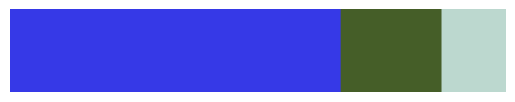

In [17]:
img = blu_cropp
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=3) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()

In [18]:
def box(img, lower_col=np.array([110,50,50]), upper_col=np.array([130,255,255])):
    # Convert BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Threshold the HSV image to get only specified colors
    mask = cv2.inRange(hsv, lower_col, upper_col)
    # Bitwise-AND mask and original image
    # res = cv.bitwise_and(frame,frame, mask= mask)
    
    # use mask for box 
    # invert mask so the box is right 
    mask_inv = cv2.bitwise_not(mask)

    # find contours 
    ret,thresh = cv2.threshold(mask_inv,127,255,0)
    contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    #produce boxed frame and cropped boxed frame 
    boxed,cropped = draw_bounding_box(contours, img)
    
    return boxed, cropped

In [19]:
blu = cv2.imread('blu.jpeg', 1)
a,b = box(blu)



In [20]:
cv2.imshow("Bounding Rectangle", a)
cv2.waitKey(0)
cv2.destroyAllWindows()